# Working with King County House dataset

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

## Functions

In [ ]:
def clean_df(df, 
            bedrooms_min = 0, 
            bedrooms_max = 11, 
            condition_min = 0, 
            condition_max = 10, 
            grade_min = 0, 
            grade_max = 20, 
            house_age_min = 0, 
            house_age_max = 300, 
            price_min = 0, 
            price_max = 7700000):
    """
    Cleans the dataframe with specified conditions.

    df - dataframe that will be altered
    bedrooms_min - Minimum bedrooms,
    bedrooms_max - Maximum bedrooms, set to 11 as default
    condition_min - Minimum condition of a home, set to 1 (Fair) by default
    condition_max - Maximum condition of a home, set to 4 (Very Good) by default
    grade_min - Minimum grade for a home, set to 5 (Fair) by default
    grade_max - Maximum grade for a home, set to 11 (Excellent) by default
    house_age_min - Minimum age for a home, set to 0 by default
    house_age_max - Maximum age for a home, set to 300 by default 
    price_min - Minimum price for a home, set to 0 by default 
    price_max - Maximum price for a home, set to 7700000 by default
    
    """

    # Creating a copy of df and creating for future data shaping.
    df_copy = df.copy()
    drop_columns = ['waterfront', 'view', 'sqft_basement','sqft_lot','sqft_lot15']
    condition_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}

    # Dropping unnecessary columns and removing a 
   # df_copy.drop(drop_columns, axis= 1, inplace=True)
    df_copy = df_copy[df_copy['bedrooms']!=33]
    
    df_copy['date'] = pd.to_datetime(df_copy["date"])
    
    df_copy['grade_value'] = df_copy['grade'].map(lambda x: x[:2])
    df_copy['grade_value'] = df_copy['grade_value'].astype(int)

    df_copy['age'] = df_copy['yr_built']
    df_copy.loc[df_copy['yr_renovated'] != 0, 'age'] = df_copy['yr_renovated']
    df_copy['age'] = df_copy['age'].map(lambda x: 2015-x)

    df_copy['condition_num'] = df_copy['condition'].map(condition_dict)

    df_copy = df_copy[df_copy['bedrooms'] >= bedrooms_min]
    df_copy = df_copy[df_copy['bedrooms'] <= bedrooms_max]

    df_copy = df_copy[df_copy['condition_num'] >= condition_min]
    df_copy = df_copy[df_copy['condition_num'] <= condition_max]

    df_copy = df_copy[df_copy['grade_value'] >= grade_min]
    df_copy = df_copy[df_copy['grade_value'] <= grade_max]

    df_copy = df_copy[df_copy['age'] >= house_age_min]
    df_copy = df_copy[df_copy['age'] <= house_age_max]

    df_copy = df_copy[df_copy['price'] >= price_min]
    df_copy = df_copy[df_copy['price'] <= price_max]

    df_clean = df_copy.copy()

    return(df_clean)

## Data Exploration

In [2]:
kc_df = pd.read_csv('../data/kc_house_data.csv')
kc_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
kc_df.bedrooms.max()

33

In [7]:
df_copy = kc_df[kc_df['bedrooms']!=33]

In [9]:
df_copy.bedrooms.max()

11

In [ ]:
kc_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [166]:
kc_df[kc_df['bedrooms'] >= 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200


In [135]:
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [136]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [137]:
kc_df[kc_df.duplicated(subset= 'id') == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,...,6 Low Average,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,...,7 Average,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,...,9 Better,2910,0.0,2012,0.0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,...,7 Average,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


In [138]:
kc_df["date"] = pd.to_datetime(kc_df["date"])

kc_df['date'].dt.year.value_counts()

2014    14622
2015     6975
Name: date, dtype: int64

In [139]:
print( kc_df['yr_built'].min() )
print( kc_df['yr_built'].max() )

1900
2015


<AxesSubplot:>

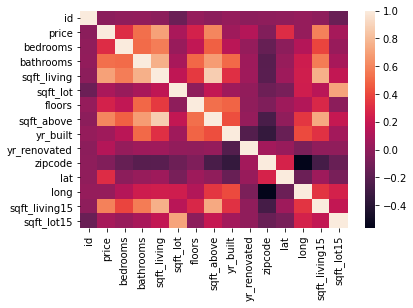

In [140]:
sns.heatmap(kc_df.corr())

In [141]:
top_ten_zc = kc_df['zipcode'].value_counts().head(10).index.values.tolist()
top_ten_zc


[98103, 98038, 98115, 98052, 98117, 98042, 98034, 98118, 98023, 98006]

In [142]:
kc_df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [143]:
kc_df['age'] = kc_df['yr_built']
kc_df.loc[kc_df['yr_renovated'] != 0, 'age'] = kc_df['yr_renovated']

In [144]:
kc_df['age']

0        1955.0
1        1991.0
2           NaN
3        1965.0
4        1987.0
          ...  
21592    2009.0
21593    2014.0
21594    2009.0
21595    2004.0
21596    2008.0
Name: age, Length: 21597, dtype: float64

In [145]:
kc_df[kc_df['price'] == 78000.0].condition


15279    Poor
Name: condition, dtype: object

In [146]:
livable_homes = kc_df[kc_df['condition'] != 'Poor']
livable_homes.reset_index(inplace=True, drop=True)

In [147]:
livable_homes['price'].max()

7700000.0

In [148]:
kc_df[kc_df['price'] == 80000.0].condition

465    Fair
Name: condition, dtype: object

In [149]:
livable_homes['price'].min()

80000.0

In [150]:
livable_homes['grade'].value_counts()

7 Average        8968
8 Good           6063
9 Better         2615
6 Low Average    2027
10 Very Good     1134
11 Excellent      399
5 Fair            233
12 Luxury          89
4 Low              26
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [151]:
livable_homes['grade'].loc[10]

'8 Good'

In [152]:
livable_homes_grade = livable_homes['grade'].copy()

In [153]:
livable_homes_grade

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21563           8 Good
21564           8 Good
21565        7 Average
21566           8 Good
21567        7 Average
Name: grade, Length: 21568, dtype: object

In [154]:
for i in range(len(livable_homes_grade)):
    livable_homes_grade.loc[i] = livable_homes_grade[i][0:2]
    livable_homes_grade.loc[i] = livable_homes_grade[i].replace(' ', '')
    livable_homes_grade.loc[i] = int(livable_homes_grade[i])

livable_homes_grade.value_counts()

7     8968
8     6063
9     2615
6     2027
10    1134
11     399
5      233
12      89
4       26
13      13
3        1
Name: grade, dtype: int64

In [155]:
livable_homes['grade'] = livable_homes_grade

C:\Users\edelp\AppData\Local\Temp/ipykernel_41012/2528367777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  livable_homes['grade'] = livable_homes_grade


In [156]:
livable_homes['grade'].value_counts()

7     8968
8     6063
9     2615
6     2027
10    1134
11     399
5      233
12      89
4       26
13      13
3        1
Name: grade, dtype: int64

In [157]:
livable_homes = livable_homes[livable_homes['grade'] > 4]

In [158]:
livable_homes = livable_homes[livable_homes['grade'] < 11]

In [159]:
livable_homes.reset_index(inplace=True, drop=True)
livable_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21040 entries, 0 to 21039
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21040 non-null  int64         
 1   date           21040 non-null  datetime64[ns]
 2   price          21040 non-null  float64       
 3   bedrooms       21040 non-null  int64         
 4   bathrooms      21040 non-null  float64       
 5   sqft_living    21040 non-null  int64         
 6   sqft_lot       21040 non-null  int64         
 7   floors         21040 non-null  float64       
 8   waterfront     18719 non-null  object        
 9   view           20980 non-null  object        
 10  condition      21040 non-null  object        
 11  grade          21040 non-null  object        
 12  sqft_above     21040 non-null  int64         
 13  sqft_basement  21040 non-null  object        
 14  yr_built       21040 non-null  int64         
 15  yr_renovated   1730

In [161]:
livable_homes['condition'].value_counts()

Average      13592
Good          5596
Very Good     1686
Fair           166
Name: condition, dtype: int64

In [277]:
df = pd.read_csv('../data/kc_house_data.csv')


In [279]:
df_clean = clean_df(df)

In [281]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13679 entries, 0 to 21595
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             13679 non-null  int64         
 1   date           13679 non-null  datetime64[ns]
 2   price          13679 non-null  float64       
 3   bedrooms       13679 non-null  int64         
 4   bathrooms      13679 non-null  float64       
 5   sqft_living    13679 non-null  int64         
 6   floors         13679 non-null  float64       
 7   condition      13679 non-null  object        
 8   grade          13679 non-null  object        
 9   yr_built       13679 non-null  int64         
 10  yr_renovated   13679 non-null  float64       
 11  zipcode        13679 non-null  int64         
 12  lat            13679 non-null  float64       
 13  long           13679 non-null  float64       
 14  grade_value    13679 non-null  int32         
 15  age            1367

In [276]:
df_clean[df_clean['price'] == 3850000.0]

,id,date,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,grade_value,age,condition_num
2083,8106100105,2014-11-14,3850000.0,4,4.25,5770,2.0,Good,11 Excellent,1980,0.0,98040,47.585,-122.222,11,35.0,3


# **Family Matters Program**
**Authors:** _Gregory Han, Ferit Yikar, Edel Prado_

![family_matters_prgm_logo](images\title.png)

## Overview
<img src="images\kc_neighborhood.jpg" width=80%>

This project analyzes the King County Housing data to create a recommendation on which homes to buy for financially struggling families. Descriptive analysis of home features, location, and grade show that some zip codes are better suited for buying houses. The King County Housing Authority can use this analysis to better select homes with the least amount of investment.

## Business Understanding
King County Housing Authority (KCHA), who provides housing assistance for people with low income in King County, has received a fortune from a generous donor to purchase homes for struggling families. KCHA will be using this donation in their Family Matters Program where families would be given homes that they can manage paying the property taxes. Using the King County Hosuing data, we describe patterns in sold homes price to predict where KCHA should buy homes, what the most important features of a home is regarding price, and how to search for the best fit home.

## Data Understanding
The King County Housing dataset contains 21,597 sold homes from the past year (2014-2015). Each record lists their individual home features such as number of bedrooms, square feet of the home, and home location (in latitude and longitude).

In [5]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

### Data Cleaning

## Analysis

## Conclusion

This analysis gives us three recommendations for purchasing homes for KCHA's Family Matters Program:
- <u> Where should we buy homes? </u>
    - Buy the most amount of homes, target the lighter areas on the zip code map.
<br><br>

- <u>What feature is most important for prices of homes?</u>
    - Grade and square feet living are the most prominent factors in price
<br><br>
- <u>How to search for the best fit home?</u>
    - Use the Robin Hood Algorithm™  to decide whether a specific house is a good buy compared to the KC area.




## For More Information
Please review our full analysis in our [Jupyter Notebook](./King_House_Sales.ipynb) or our [presentation](./presentation.pdf).

For any additional questions, please contact

<img src="images\greg.png" width=10%> Gregory Han: gregoryhhan@gmail.com <br />

<img src="images\ferit.png" width=10%> Ferit Yikar: yikarferit@gmail.com <br />

<img src="images\eddie.png" width=10%> Edel Prado: edel.prado.jr@gmail.com <br />

## Repository Structure

```
├── README.md                           
├── King_House_Sales.ipynb   
├── presentation.pdf 
├── notebooks 
├── data                                
└── images 
```